In [33]:
import pandas as pd
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

data = pd.read_csv("iris_data.csv")

data["Species"] = encoder.fit_transform(data["Species"].astype(str))

data

Sepal length  Sepal width  Petal length  Petal width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]

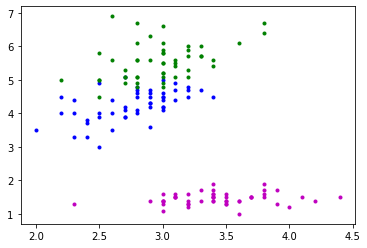

In [46]:
import matplotlib.pyplot as plt

colors=['m.','b.','g.','c.','k.','y.','r.']

for i in range(len(data)):
    
    plt.plot(data["Sepal width"][i],data["Petal length"][i], colors[data["Species"][i]])
    
    
    

    
    
   


num of unique:  3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[4.97391304 3.40217391 1.47173913 0.24347826 0.        ]
 [5.93809524 2.79047619 4.29761905 1.33809524 1.        ]
 [6.37567568 2.95945946 5.36216216 2.04324324 2.        ]]


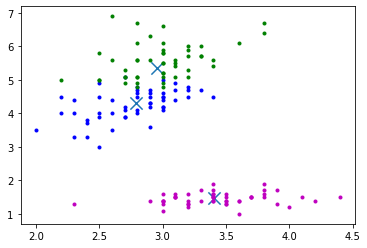

In [62]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

bandwidth = estimate_bandwidth(data, quantile=0.2,
                              n_samples=100)
ms=MeanShift(bandwidth=bandwidth, bin_seeding=True)

#data2 = data.drop(['Species'], axis=1)

ms.fit(data)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

for i in range(len(data)):
    plt.plot(data["Sepal width"][i],data["Petal length"][i], colors[labels[i]])

#Sepal width and petal length is colum nr 2 and 3 in the dataframe.     
plt.scatter(cluster_centers[:,1],cluster_centers[:,2],
            marker = "x", s=150)

print("num of unique: ",n_clusters_)
print(labels)
print(cluster_centers)